# Assignment 7: Movie Review Sentiment Classification

**GOAL**: Develop a sentiment classifier that determines the sentiment of documents as positive or negative.

### 0. Data: Naver Movie review dataset

In [1]:
import pandas as pd

df = pd.read_csv('movie_reviews_5k.csv', sep='\t')
df

,document,label
0,"맥클레인과 그랜트는 특수부대를 이끌고 그 교회를 포위하나, 이미 탈출준비를 해 놓은...",1
1,"누구나 예상할수있는 뻔한스토리,,,,,,,",0
2,세계최고의 스토리텔러들이 모이면 심슨이 탄생한다,1
3,어제 알았네요. 이 영화. 그래도 아쉽긴하지만 더 좋은 작품을 만드는 힘을 가지길 ...,1
4,왜이리 어설픔....답답도 하고....,0
...,...,...
4995,정말 명작이네요..............물론 보진 않았습니다.,1
4996,드라큐라 곧 개봉예정이라 복습하러 왔습니다. 당시 컬쳐쇼크 당한 영화. 희대의 명작...,1
4997,공들인건알겠다. 근데 노잼,0
4998,4년만에 찾은 공원이 어제 구경간 곳 마냥 무덤덤,0


Let's check the distribution of classes. It shows no imbalance between positive/negative classes.

<Axes: >

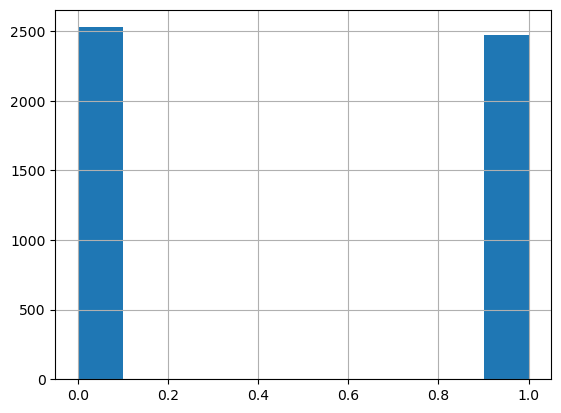

In [2]:
df.label.hist()

### Problem 1. Draw a word cloud

Draw a word cloud using the `document` column in the dataframe `df`.

* Save the word cloud image using `plt.savefig('wordcloud.png')`.

In [6]:
# your code here 
# ...

document = ' '.join(df.document.values)

from konlpy.tag import Okt

def okt_tokenizer(text, return_nouns_only=True):
    """ 
    input: korean text
    output: tokens
    
    if return_nouns_only option is True, only nouns will be extracted.
    """
    okt = Okt()
    
    if return_nouns_only:
        tokens = okt.nouns(text)
    else:
        tokens = okt.morphs(text)
    
    # you can refer to the site below that lists Korean stopwords
    # https://www.ranks.nl/stopwords/korean
    # stopwords = ['입니다', '은', '는', '이', '가', '이거', '저거', '그거', '여기', '이쪽', ]
    stopwords = ['입니다', '은', '는', '이', '가', '이거', '저거', '그거', '여기', '이쪽']    
    tokens = [n for n in tokens if n not in stopwords]
    return tokens


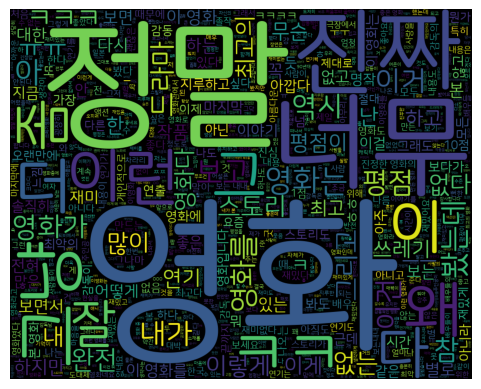

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(font_path='NanumSquareRoundR.ttf', width=1000, height=800, max_words=1000).generate(document)
plt.savefig('wordcloud.png')
plt.imshow(wc)
plt.axis("off")
plt.show()

### Problem 2. Document Vectorization

- Use `TfidfVectorizer` with `ngram_range=(1,2), max_features=1000` options.
    - `from sklearn.feature_extraction.text import TfidfVectorizer`
- Define and use your custom tokenizer for Korean.
    - Use twitter tokenizer (`from konlpy.tag import Okt`)

In [10]:
# your code here 
# ...
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

count_vect = CountVectorizer(max_features=1000, # select top 1000 frequent tokens
                             ngram_range=(1, 2), # use unigram and bigram
                             lowercase=True, # lowercase input text
                             stop_words=['입니다', '은', '는', '이', '가', '이거', '저거', '그거', '여기', '이쪽']) # remove predefined stop words for English
X_counts = count_vect.fit_transform(df['document'])

tfidf_vect = TfidfVectorizer(max_features=1000, # select top 1000 frequent tokens
                             ngram_range=(1, 2), # use unigram and bigram
                             lowercase=True, # convert all characters to lowercase before tokenizing
                             stop_words=['입니다', '은', '는', '이', '가', '이거', '저거', '그거', '여기', '이쪽']) # remove predefined stop words for English
X_tfidfs = tfidf_vect.fit_transform(df['document'])

X_counts.shape, X_tfidfs.shape

((5000, 1000), (5000, 1000))

In [11]:
X_counts, X_tfidfs

(<5000x1000 sparse matrix of type '<class 'numpy.int64'>'
 	with 13282 stored elements in Compressed Sparse Row format>,
 <5000x1000 sparse matrix of type '<class 'numpy.float64'>'
 	with 13282 stored elements in Compressed Sparse Row format>)

In [13]:
df_bow_tf = pd.DataFrame(X_counts.todense(), columns=count_vect.get_feature_names_out())
df_bow_tf

,0점은,10,10점,10점을,1점,1점도,1점도 아깝다,1편보다,2점,2점부터,...,현실을,현실적인,혼자,화려한,확실히,환상의,훌륭한,훨씬,흔한,힘든
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df_bow_tfidf = pd.DataFrame(X_tfidfs.todense(), columns=tfidf_vect.get_feature_names_out())
df_bow_tfidf

,0점은,10,10점,10점을,1점,1점도,1점도 아깝다,1편보다,2점,2점부터,...,현실을,현실적인,혼자,화려한,확실히,환상의,훌륭한,훨씬,흔한,힘든
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
X = df_bow_tfidf
y = df.label
X.shape, y.shape

((5000, 1000), (5000,))

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# data split
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)
X_trn.shape, X_tst.shape, y_trn.shape, y_tst.shape

# model training: Lasso (l1 penalty)
clf = LogisticRegression(penalty='l1', solver='saga', C=10, random_state=0)
clf.fit(X_trn, y_trn)

# model evaluation
y_trn_pred = clf.predict(X_trn)
acc = accuracy_score(y_trn, y_trn_pred)
f1 = f1_score(y_trn, y_trn_pred)
print('Training Accuracy: {:.4f}, Fscore: {:.4f}'.format(acc, f1))
y_tst_pred = clf.predict(X_tst)
acc = accuracy_score(y_tst, y_tst_pred)
f1 = f1_score(y_tst, y_tst_pred)
print('Test Accuracy: {:.4f}, Fscore: {:.4f}'.format(acc, f1))

Training Accuracy: 0.8186, Fscore: 0.7972
Test Accuracy: 0.6740, Fscore: 0.6370


C:\Users\01wkd\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### Problem 3. Develop a Sentiment Classifier

- Split data into training and test datasets using `train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)`
- Use logistic regression with Lasso penalty: `LogisticRegression(penalty='l1', solver='saga', C=10, random_state=0)`
- For the training and test data sets, check the accuracy score.


In [5]:
# your code here
# ...

### Problem 4. Keyword extraction

- What is the most positive word (having the largest positive coefficient value)?
- What is the most negative word (with the largest absolute value among negative coefficients)?

In [6]:
# your code here
# ...